## Proyecto III
### Recolección de escombros

#### Definición del problema

El gobierno de una ciudad quiere implementar un sistema para la
recolección de escombros en caso de desastres naturales. Cuando ocurre uno de estos eventos, el gobierno define un conjunto de puntos de recolección.

La primera tarea es liberar las calles para permitir el acceso a todas las zonas de la ciudad. Para ello se lleva el escombro al punto de recolección más cercano. Posteriormente, el gobierno define el punto final donde se almacenará el escombro. A la hora de la recolección, el gobierno asigna preferencias a los puntos de recolección de acuerdo a qué tan rápido quiere que sean desalojados. Consoderando que se desea desalojar N puntos de recolección en M jornadas laborales y que se tienen disponibles K camiones de carga, los objetivos del gobierno son:

1. Desalojar la mayor cantidad de puntos de recolección.

2. Desalojar la mayor cantidad de escombro.

En este proyecto se resolverá el primer objetivo mencionado, por lo cual se busca desalojar la mayor cantidad de puntos de recolección.

### Función objetivo

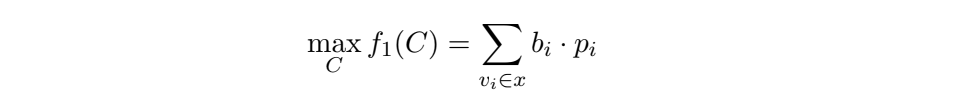

### Código

A continuación se muestra la implementación para la resolución del objetivo 1.

In [ ]:
# Importar las librerías necesarias

import numpy as np
import random
import math
import itertools

In [ ]:
# Definir los parámetros de entrada

V = np.array([1, 2, 3, 4])        # Puntos de recolección
W = np.array([1])                 # Dépositos
q_v = np.array([40, 30, 20, 20])  # Cantidad de escombro en cada punto de recolección
q = 10                            # Capacidad de carga de cada camión m3
dV_w = np.array([30, 20, 50, 35]) # Distancia recolección-depósito km
dW_v = np.array([20, 30, 50, 15]) # Distancia depósito-recolección km
vel = 50                          # Velocidad de los camiones kn/hr
K = 1                             # Número de camiones
M = 4                             # Número de jornadas de trabajo
N_ = 8                            # Número de horas por jornada de trabajo
t = 0.1                           # Tiempo requerido para cargar 1m3 de escombro (tiempo en horas)

In [ ]:
# Crear una función que me permita saber cuantas veces será necesario visitar el nodo, en función de la capacidad de los camiones
# Como paramétros de entrada:
  # El conjunto de puntos de recolección (V)
  # Cantidad de escombro en el punto V (q_v) dada en metros cúbicos
  # Capacidad de carga de cada camión (q) dada en metros cúbicos

def numberVisits(V:np.array, q_v:np.array, q:np.array)->int:
  copy = q_v.copy()
  visits_list = []
  for i in range(len(V)):
    visits = copy[i] / q
    visits_list.append(math.ceil(visits))

  return visits_list

In [ ]:
numberVisits(V, q_v, q)

[4, 3, 2, 2]

In [ ]:
# Crear una función que me diga cuanto tiempo toma llagar e irme de un nodo en específico al depósito.
# Como paramétros de entrada:
  # El nodo que se quiere visitar
  # La cantidad de escombro que tiene ese nodo
  # Tiempo requerido para cargar un metro cúbico de escombros en un camión (t) en horas.

def time2Go(node: int, dV_w: np.array, dW_v: np.array, vel: float)->int:
  node -= 1
  distance = dV_w[node] + dW_v[node]
  time = distance/vel
  return distance, time

In [ ]:
time2Go(3, dV_w, dW_v, vel)

(100, 2.0)

In [ ]:
# Crear una función que me diga cuanto tiempo es necesario para cargar un camión.
  # El resultado se regresa en horas

def time2Charge(node: int, q_v: np.array, q: int, t: float)->float:
  node -= 1
  punto = q_v[node]
  return punto * t

In [ ]:
time2Charge(2, q_v, q, t)

3.0

In [ ]:
# Crear una función que me regrese el número de veces el valor que es necesario visitar un nodo para dejarlo vacío
# Como datos de entrada:
  # Los puntos de recolección V
  # La c

def baseSolution(V: np.array, q_v: np.array, q: int)->list:
  copy = q_v.copy()
  visits = numberVisits(V, copy, q)
  permutation = []
  ints = list(map(int, visits))
  for i in range(len(ints)):
    permutation.extend((([V[i]] * ints[i])))

  return permutation


In [ ]:
baseSolution(V, q_v, q)

[1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4]

In [ ]:
# Generar soluciones en base a la permutación original.
def getInitialPopulation(N: int, V: np.array ,q_v: np.array, q: int)->list:
  copy = q_v.copy()
  base = baseSolution(V, copy, q)
  idx = [e for e in range(len(base))]
  population = []
  for _ in range(N):
    random.shuffle(idx)
    population.append(idx.copy())

  return population

In [ ]:
popu = getInitialPopulation(10, V, q_v, q)
popu

[[1, 9, 6, 3, 4, 5, 2, 7, 0, 10, 8],
 [4, 7, 10, 3, 0, 8, 1, 6, 2, 9, 5],
 [4, 5, 2, 1, 9, 6, 0, 8, 10, 7, 3],
 [10, 0, 6, 9, 1, 2, 8, 7, 3, 5, 4],
 [9, 3, 7, 6, 1, 10, 5, 0, 2, 8, 4],
 [8, 2, 7, 1, 6, 3, 4, 10, 5, 0, 9],
 [5, 8, 3, 4, 1, 7, 6, 9, 10, 0, 2],
 [2, 3, 10, 0, 7, 6, 8, 1, 5, 4, 9],
 [8, 5, 6, 9, 4, 2, 3, 7, 10, 0, 1],
 [9, 7, 0, 3, 6, 10, 1, 4, 2, 8, 5]]

In [ ]:
# Función encargada de transformar la permutación inicial en
def convert2Original(indiv: list, N: int, V: np.array, q_v: np.array, q: int)->tuple:
  copy = q_v.copy()
  base = baseSolution(V, copy, q)
  index = indiv
  convert = []
  for i in range(len(base)):
    r = index[i]
    c = base[r]
    convert.append(c)
  return index, convert

In [ ]:
conv = convert2Original(popu[0], 100, V, q_v, q)
conv

([1, 9, 6, 3, 4, 5, 2, 7, 0, 10, 8], [1, 4, 2, 1, 2, 2, 1, 3, 1, 4, 3])

In [ ]:
def f(permutation: list, N: int, V: np.array, q_v: np.array, q: int, N_: int, M: int, t: float)->list:
  horas = 0
  dist = 0
  pref = 0
  copy = q_v.copy()
  totalHours = N_ * M
  recorridoValido = []
  for index in permutation:
    if horas < totalHours:
      ida = time2Go(index, dV_w, dW_v, vel)
      carga = time2Charge(index, copy, q, t)
      if horas + ida[1] + carga <= totalHours:
        recorridoValido.append(index)
        horas += ida[1] + carga
        dist += ida[0]
  for pos in recorridoValido:
    if 0 <= pos < len(copy):
      copy[index - 1] -= 10
    if copy[index -1] == 0:
      pref += 1
  return [recorridoValido, [pref]]

In [ ]:
eval = f(conv[1], 100, V, q_v, q, N_, M, t)
eval

[[1, 4, 2, 1, 2, 2, 1], [1]]

In [ ]:
def mutacion_heuristica(p: list, k: int, N: int, V: np.array, q_v: np.array, q: int, N_: int, M: int, t: float)->list:
  #p = [0, 4, 8, 1, 2, 5, 10, 7, 9, 3, 6]
  permutacion = np.array(convert2Original(p, N, V, q_v, q))
  #print(permutacion2)
  #permutacion = np.array(permutacion[1])
  #permutacion = np.array([1, 2, 3, 1, 4, 3, 1, 2, 4, 1, 2])
  #print('permutation: ', permutacion)
  posiciones = np.random.choice(range(len(permutacion[1])), size = 3, replace = False)
  posiciones.sort()
  #print(posiciones)
  permutaciones = itertools.permutations(posiciones)
  mutaciones = []
  for per in permutaciones:
    copia = permutacion[1].copy()
    copia[list(posiciones)] = permutacion[1][list(per)]
    #print(copia)
    mutaciones.append((copia, f(copia, N, V, q_v, q, N_, M, t)))
    #print(mutaciones)
  #print('Mutaciones', mutaciones)
  #print('Mutación pos 0',mutaciones[0][1])
  mutaciones.sort(key=lambda x: x[0][1])
  #print('Mutaciones ordenadas: ', mutaciones)
  return mutaciones[0][1]

In [ ]:
mu = mutacion_heuristica(popu[0], 3, 100, V, q_v, q, N_, M, t)

In [ ]:
mu

[[1, 4, 2, 1, 2, 2, 1], [1]]

In [ ]:
def crossover_sexual_middle(indiv_1: list, indiv_2: list)->list:
    crossover_point = random.randint(1, len(indiv_1) - 1)
    child = indiv_1[:crossover_point]
    for p2 in indiv_2:
      if p2 not in child:
        child.append(p2)
    return child

In [ ]:
crossover_sexual_middle(popu[0],popu[1])

[1, 9, 6, 3, 4, 5, 2, 7, 10, 0, 8]

In [ ]:
def selection_comma(parents, children):
    mu = len(parents)
    children.sort(key=lambda x:x [x][1])
    new_pop = children[:mu]
    parents.sort(key=lambda x:x[0])
    if parents[0] < new_pop[-1]:
        new_pop[-1] = parents[0]
    return new_pop

In [ ]:
def EE(N: int, T: float, G: int, n: int):

    # T = 1/np.sqrt(n)
    population = getInitialPopulation(100, V, q_v, q)
    population_idx = range(N)
    pop = []
    for gen in range(G):
        children = []
        for i in range(N):
            parents_idx = np.random.choice(population_idx, 2)
            parent_1 = population[population_idx[0]]
            #print('parent1', parent_1)
            parent_2 = population[population_idx[1]]
            #print('parent2', parent_2)
            child = crossover_sexual_middle(parent_1, parent_2)
            #print('child', child)
            children.append(mutacion_heuristica(child, n, N, V, q_v, q, N_, M, t))
            print('children', children[i][1])
        #population = children[gen][]
        #print(children)
    children.sort(key = lambda x: x[1])
    return children[-1]

In [ ]:
n = 3

In [ ]:
EE(5, 1/np.sqrt(n), 10, n)

children [2]
children [1]
children [1]
children [1]
children [3]
children [3]
children [3]
children [1]
children [1]
children [1]
children [1]
children [1]
children [1]
children [1]
children [1]
children [3]
children [3]
children [1]
children [3]
children [1]
children [1]
children [1]
children [3]
children [1]
children [1]
children [2]
children [1]
children [1]
children [1]
children [1]
children [1]
children [1]
children [1]
children [1]
children [1]
children [1]
children [1]
children [1]
children [2]
children [1]
children [1]
children [3]
children [1]
children [1]
children [3]
children [1]
children [1]
children [1]
children [1]
children [1]


[[3, 1, 3, 4, 4, 2, 1, 2], [1]]